In [19]:
#Instalação de bibliotecas python que irei utilizar
!pip install pandas numpy seaborn matplotlib scikit-learn

In [4]:
# Importar as bibliotecas necessárias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [26]:
# Carregar o dataset diretamente do link 
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv"
iris = pd.read_csv(url)

# Visualizar as primeiras linhas do dataset
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [52]:
iris = iris.iloc[1: , :]

In [49]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 1 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  149 non-null    float64
 1   sepal_width   149 non-null    float64
 2   petal_length  149 non-null    float64
 3   petal_width   149 non-null    float64
 4   species       149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [31]:
# Estatísticas descritivas basicas para as colunas
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.054362,3.773826,1.206040
std,0.828594,0.435810,1.760543,0.760354
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


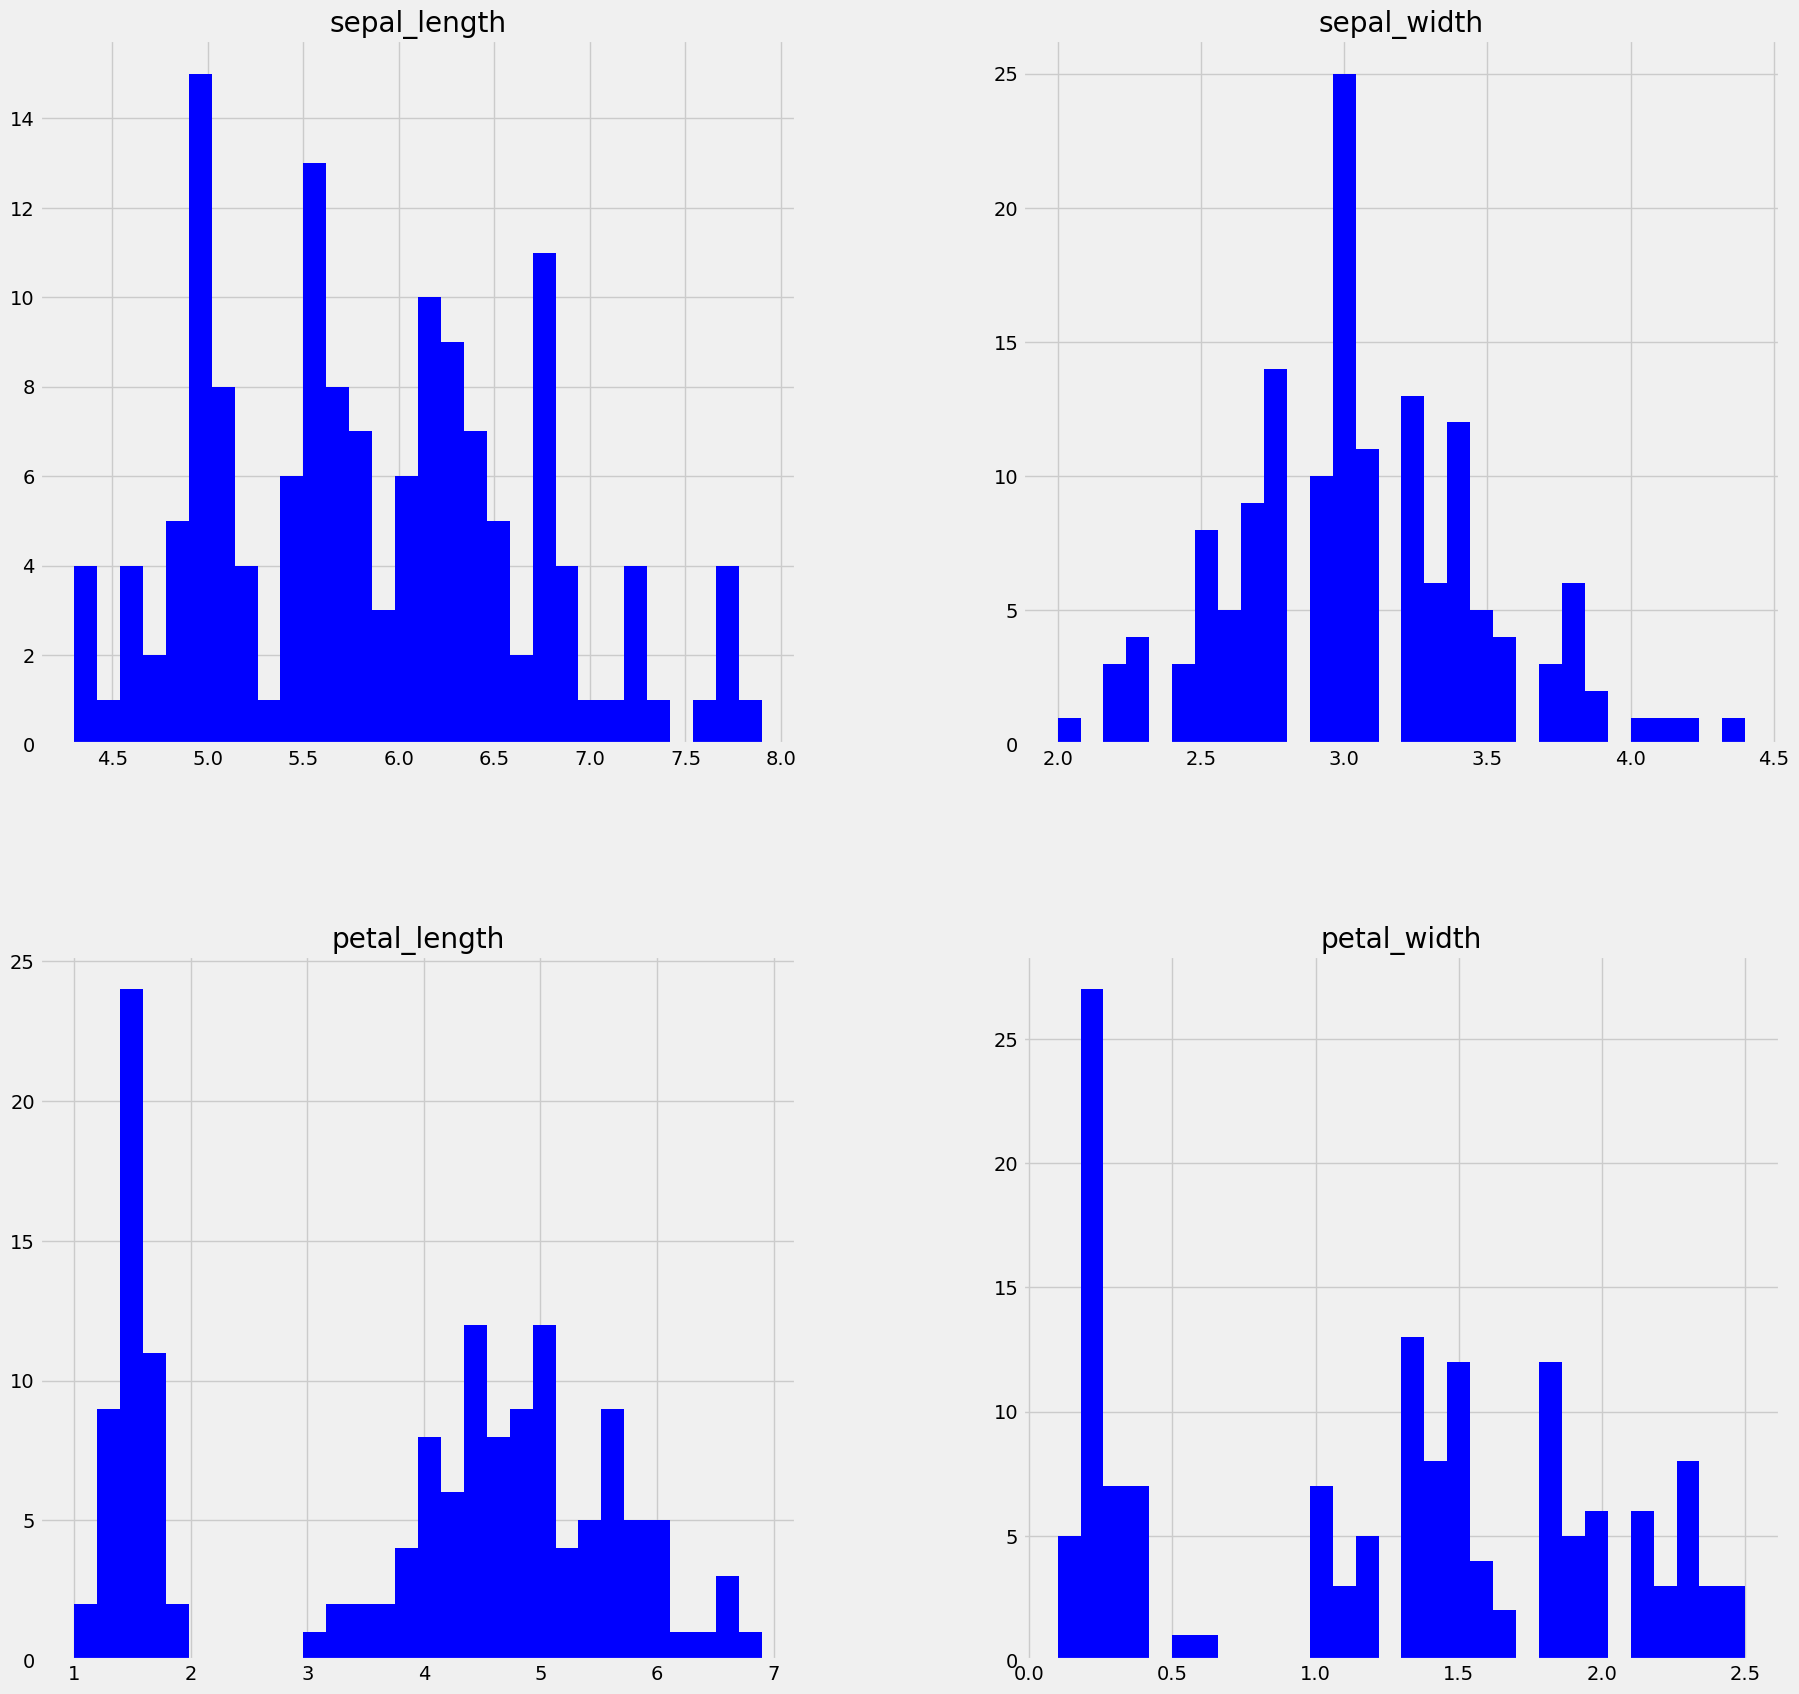

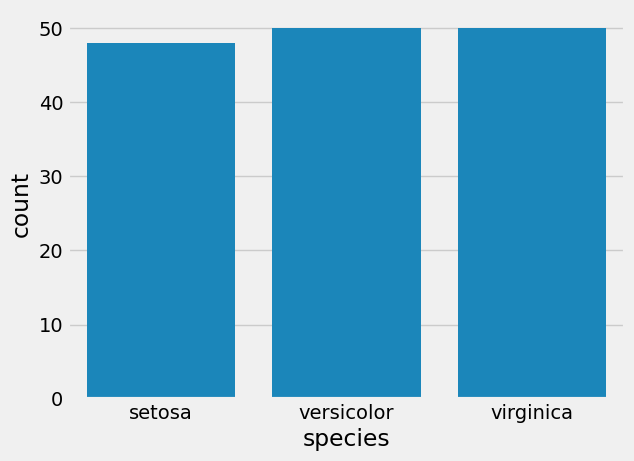

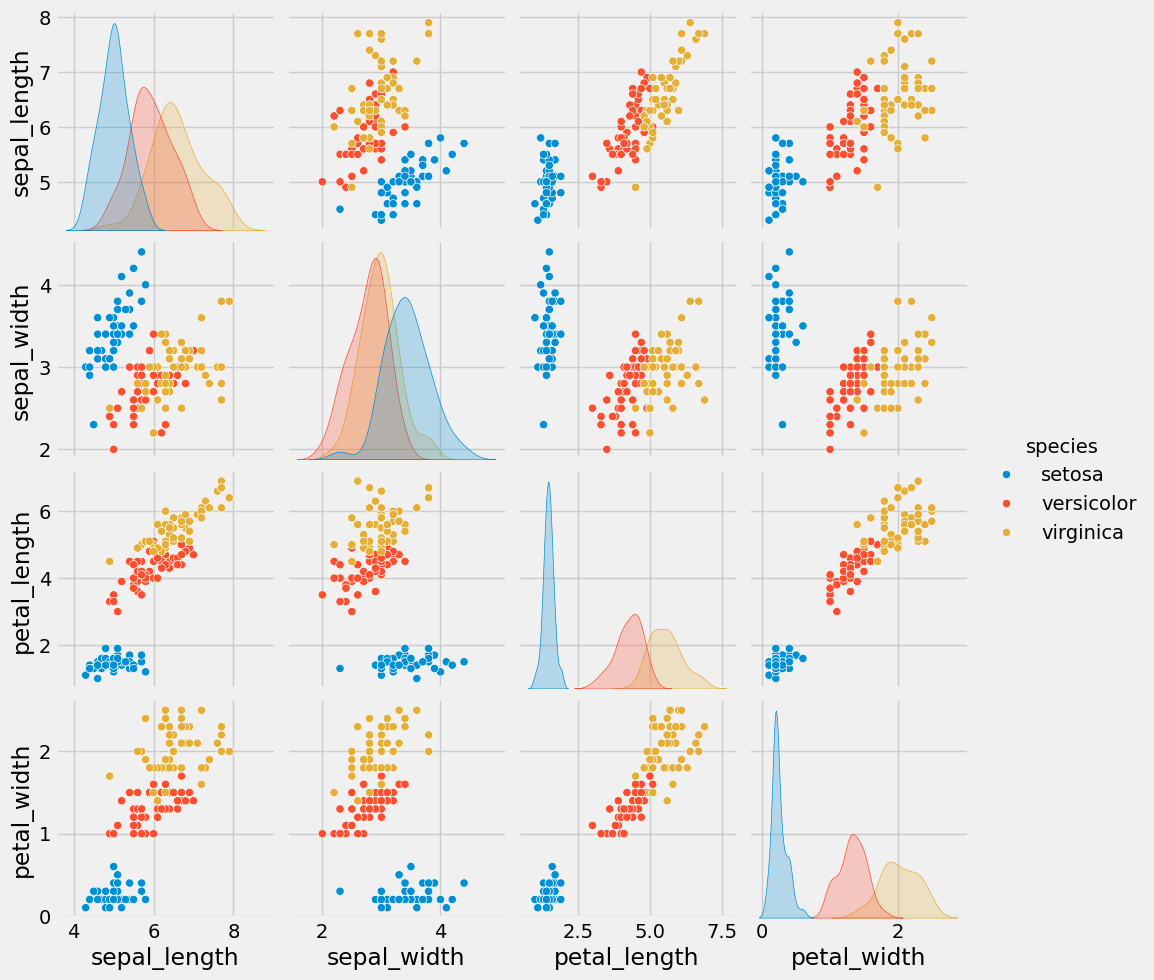

In [54]:
# Visualizar a distribuição das classes

plt.style.use('fivethirtyeight')
iris.hist(bins=30, figsize=(20, 20),color='blue')
plt.show()

sns.countplot(x='species', data=iris)
plt.show()

# Pairplot para visualizar as relações entre diferentes features
sns.pairplot(iris, hue='species')
plt.show()

In [44]:
# Separar as features do target
X = iris.drop('species', axis=1)
#definindo o target
y = iris['species']

# Dividir os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [45]:
# Treinar o modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Fazer previsões com os dados do teste
y_pred = knn.predict(X_test)

In [46]:
# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:")
print(conf_matrix)

# Relatório de classificação
class_report = classification_report(y_test, y_pred)
print("Relatório de Classificação:")
print(class_report)

Matriz de Confusão:
[[10  0  0]
 [ 0  7  2]
 [ 0  0 11]]
Relatório de Classificação:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.78      0.88         9
   virginica       0.85      1.00      0.92        11

    accuracy                           0.93        30
   macro avg       0.95      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



In [47]:
# Conclusão sobre o desempenho do modelo
print("O modelo KNN desempenhou bem na classificação das espécies de íris.")

O modelo KNN desempenhou bem na classificação das espécies de íris.
